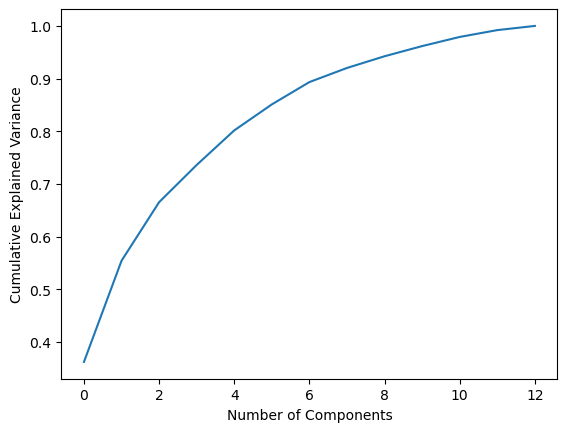

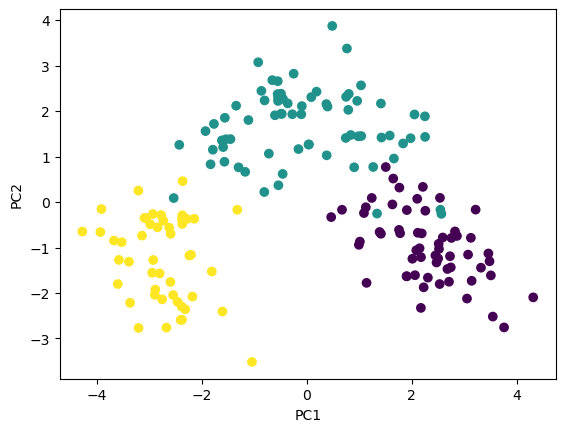

Silhouette Score: 0.30
Adjusted Rand Index: 0.30


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [2]:
#Assignment: PCA Implementation
#Objective: The objective of this assignment is to implement PCA on a given dataset and analyse the results.
#Ans.
#1. Import Libraries and Load the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Load the dataset
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

#2. Data Preprocessing
# Split the dataset into features and target variables
X = wine.iloc[:, 1:].values
y = wine.iloc[:, 0].values
# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#3. PCA Implementation
# Perform PCA on the preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X)

#4. Optimal Number of Principal Components
# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
# Retain the first 10 principal components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

#5. Visualize the Results of PCA
# Visualize the results of PCA using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#6. Clustering Analysis
# Perform clustering on the PCA-transformed data using K-Means clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Calculate the performance metrics for the clustering algorithm
from sklearn.metrics import silhouette_score, adjusted_rand_score, completeness_score, homogeneity_score

silhouette = silhouette_score(X_pca, kmeans.labels_)
ari = adjusted_rand_score(y, kmeans.labels_)
completeness = completeness_score(y, kmeans.labels_)
homogeneity = homogeneity_score(y, kmeans.labels_)

# Print the performance metrics
print('Silhouette Score: {:.2f}'.format(silhouette))
print('Adjusted Rand Index: {:.2f}'.format(silhouette))